In [65]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from scipy.optimize import curve_fit

In [66]:
data = pd.read_csv(r'D:\Left GM Tube.csv')
pressure = data.iloc[:,0]
anode_voltage = data.iloc[:,2]
current = abs(1e6*data.iloc[:,3])
time = data.iloc[:,4]
counts = data.iloc[:,-1]
breakdown = data.iloc[:,1]

In [67]:
unique_p = []
unique_V = []

for p in pressure:
    if p in unique_p:
        pass
    else:
        unique_p.append(float(p))

for V in anode_voltage:
    if V in unique_V:
        pass
    else:
        unique_V.append(float(V))

In [68]:
df = pd.DataFrame(columns=[unique_V], index=unique_p)

i, j, k = 0, 0, 0

for i in range(pressure.size):
    try:
        if pressure[i+1] == pressure[i]:
            df.iloc[j, k] = float(counts[i])
            k+=1
        else:
            j+=1
            k = 0
            df.iloc[j, k] = (counts[i])
    except:
        None
df = df.fillna(0.0)

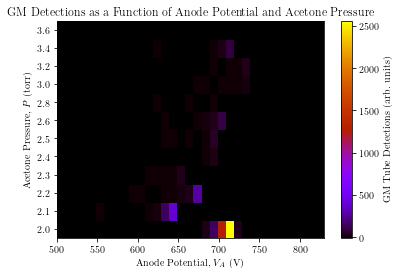

In [128]:
fig1, ax1 = plt.subplots()

ax1.pcolormesh(df, cmap='gnuplot', edgecolors='face', vmin=-1/256*max(counts), vmax=max(counts))
ax1.set_xlabel('Anode Potential, $V_A$ (V)')
ax1.set_ylabel('Acetone Pressure, $P$ (torr)')
ax1.yaxis.set_ticks(np.arange(0.5, len(df.index), 1))
ax1.yaxis.set_ticklabels(df.index)
ax1.xaxis.set_ticks([0, 5, 10, 15, 20, 25, 30])
ax1.xaxis.set_ticklabels([500, 550, 600, 650, 700, 750, 800])
ax1.set_title('GM Detections as a Function of Anode Potential and Acetone Pressure')
cbar = fig1.colorbar(mpl.cm.ScalarMappable(norm=mpl.colors.Normalize(vmin=-1/256*max(counts), vmax=max(counts)), cmap='gnuplot'))
cbar.set_label('GM Tube Detections (arb. units)')
plt.savefig('GM Param Space.jpg', dpi=1200)
plt.show(ax1)

In [73]:
unique_VB = []

i = 0
for i in range(breakdown.size):
    try:
        if pressure[i+1]!=pressure[i]:
            unique_VB.append(float(breakdown[i]))
        else:
            pass
    except:
        None
unique_VB.append(float(breakdown.iloc[-1]))

[2.0, 2.1, 2.2, 2.3, 2.4, 2.5, 2.6, 2.8, 3.0, 3.2, 3.4, 3.6]


In [122]:
def linear_fit(P, a, b):
    return(a*P+b)

def log_fit(P, A, B, C):
    return(A*np.log(B*P)+C)

linear_popt, linear_pcov = curve_fit(linear_fit, unique_p[0:-3], unique_VB[0:-3])
log_popt, log_pcov= curve_fit(log_fit, unique_p[0:-3], unique_VB[0:-3])

lin_variance = sum((unique_VB[0:-3]-np.mean(unique_VB[0:-3]))**2)
lin_residuals = sum((unique_VB[0:-3]-linear_fit(np.array(unique_p[0:-3]), linear_popt[0], linear_popt[1]))**2)
lin_rsquared = 1-(lin_residuals/lin_variance)

log_variance = sum((unique_VB[0:-3]-np.mean(unique_VB[0:-3]))**2)
log_residuals = sum((unique_VB[0:-3]-log_fit(np.array(unique_p[0:-3]), log_popt[0], log_popt[1], log_popt[2]))**2)
log_rsquared = 1-(log_residuals/log_variance)

<ipython-input-122-aa94a2d4c843>:5: RuntimeWarning: invalid value encountered in log
  return(A*np.log(B*P)+C)


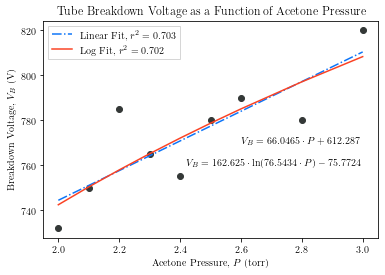

In [150]:
fig2, ax2 = plt.subplots()

ax2.scatter(unique_p[0:-3], unique_VB[0:-3], c='xkcd:charcoal')
ax2.plot(unique_p[0:-3], linear_fit(np.array(unique_p[0:-3]), linear_popt[0], linear_popt[1]), c='xkcd:deep sky blue', linestyle='-.', label='Linear Fit, $r^2=%.3g$'%lin_rsquared)
ax2.plot(unique_p[0:-3], log_fit(np.array(unique_p[0:-3]), log_popt[0], log_popt[1], log_popt[2]), c='xkcd:orangey red', label='Log Fit, $r^2=%.3g$'%log_rsquared)
ax2.set_xlabel('Acetone Pressure, $P$ (torr)')
ax2.set_ylabel('Breakdown Voltage, $V_B$ (V)')
ax2.set_title('Tube Breakdown Voltage as a Function of Acetone Pressure')
ax2.annotate('$V_B = %g\cdot P + %g$'%(linear_popt[0], linear_popt[1]), (2.6,770))
ax2.annotate('$V_B = %g\cdot\ln(%g\cdot P)%g$'%(log_popt[0], log_popt[1], log_popt[2]), (2.421, 760))
ax2.legend()
plt.savefig('GM Breakdown.jpg', dpi=1200)
plt.show()